In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [3]:
#tf.keras.Sequential()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation='selu'))#selu自带归一化
    #model.add(keras.layers.Dropout())
    #Alpha优点：均值和方差不变、激活值归一化的性质也不变
    """
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    """
model.add(keras.layers.AlphaDropout(rate=0.5))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [4]:
#[None,784] * W + b -> [None,300] W.shape=[784,300],b.shape=[300]

In [5]:
#Tensorboard   EarlyStopping ModelCheckPoint
callbacks = [
    keras.callbacks.EarlyStopping(min_delta=1e-3,patience=5)
]
history = model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=10,callbacks=callbacks)

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 2.5438 - accuracy: 0.0993 - val_loss: 2.3141 - val_accuracy: 0.0994
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3229 - accuracy: 0.0995 - val_loss: 2.3180 - val_accuracy: 0.0742
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3103 - accuracy: 0.0989 - val_loss: 2.2925 - val_accuracy: 0.1384
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 2.3087 - accuracy: 0.1002 - val_loss: 2.2948 - val_accuracy: 0.0944
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3091 - accuracy: 0.1011 - val_loss: 2.2921 - val_accuracy: 0.1682
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3097 - accuracy: 0.0993 - val_loss: 2.3102 - val_accuracy: 0.0998
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3091 - accuracy: 0.0997 - val_loss: 2.3006 - val_ac

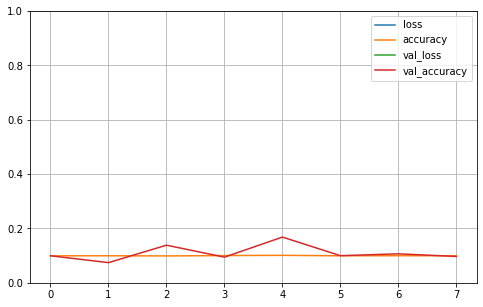

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)
#1.参数众多，训练不充分
#2.梯度消失  ->  链式法则  ->  复合函数f(g(x))
#selu缓解梯度消失

In [7]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3134 - accuracy: 0.0969


[2.3133528232574463, 0.09690000116825104]